# ICE-1 

## Import packages

In [240]:
from bs4 import BeautifulSoup

import urllib.request

import nltk

from nltk.corpus import stopwords

from wordcloud import WordCloud

import matplotlib.pyplot as plt

## Retrieve text, filter HTML content and split the text to generate tokens/list of words 

In [241]:
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/History_of_SpaceX')

#Read the HTML content from the response object
html = response.read()

# Create a beautiful soup object by passing the html content object in the argument. 
soup = BeautifulSoup(html,"html5lib")

#Eliminate html syntactical tags and data.
text = soup.get_text(strip=True)

#Split the text to form tokens/ list of words
tokens = [t for t in text.split()]


## Use FreqDist class from nltk package to generate the frequencies related to each word in the token list

In [242]:

freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

History:1
of:123
SpaceX:54
-:2
Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"544e8630-a71c-459a-b46a-afb9b0abf4f4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"History_of_SpaceX","wgTitle":"History:1
SpaceX","wgCurRevisionId":1040865877,"wgRevisionId":1040865877,"wgArticleId":53357431,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages:1
with:30
non-numeric:2
formatnum:2
arguments","Articles:1
short:2
description","Short:1
description:2
matches:2
Wikidata","Wikipedia:1
articles:6
in:77
need:5
updating:2
from:28
March:12
2018","All:1
Wikipedia:2
updating","Articles:1
containing:11
potenti

## Function that identifies words that have frequency count < 5 and creates a token list

In [243]:
def lessthan5(f):
    fr_tokens=[]
    for key,val in f.items():
        if (val < 5):
            fr_tokens.append(key)
    return fr_tokens

## Without eliminating stopwords from the wordlist

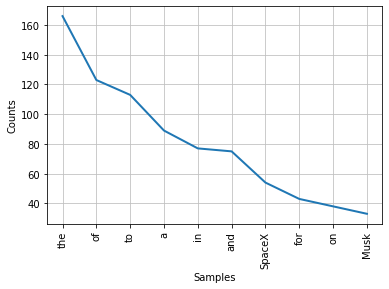

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [244]:
#Call "lessthan5" function to generate a list of words that have frequency count less than 5
del_tokens=lessthan5(freq)
f_tokens=tokens[:]
# eliminate the words that have frequency count less than 5
for f in del_tokens:
    f_tokens.remove(f)
#Generate frequency distribution object from the filtered token list
freq_tokens = nltk.FreqDist(f_tokens)
#Plot the frequency distribution for the top 10 words that have highest frequency
freq_tokens.plot(10,cumulative=False)

## After eliminating stopwords in the wordlist

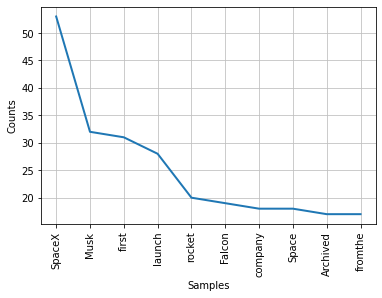

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [245]:
#Eliminate stopwords using english dictionary that is available in nltk.corpus.stopwords library.
clean_tokens = tokens[:]

sr = stopwords.words('english')

for token in tokens:
    if token in sr:
        clean_tokens.remove(token)

# Remove if there are any numerical tokens
clean_tokens = [tkn for tkn in clean_tokens if not tkn.isdigit()]

#Generate a Frequency distribution object from the filtered list of tokens
freq = nltk.FreqDist(clean_tokens)

#Call "lessthan5" function to generate a list of words that have frequency count less than 5
del_tokens=del_lessthan5(freq)
f_tokens_withoutStopWords=clean_tokens[:]
#Delete less frequent(<5) words from the token list
for f in del_tokens:
    f_tokens_withoutStopWords.remove(f)

    
#Generate a Frequency distribution object from the filtered list of tokens
freq = nltk.FreqDist(f_tokens_withoutStopWords)

#Plot the frequency distribution of the top 10 high frequency words
freq.plot(10,cumulative=False)

    

## Alternative visualization for frequency distribution

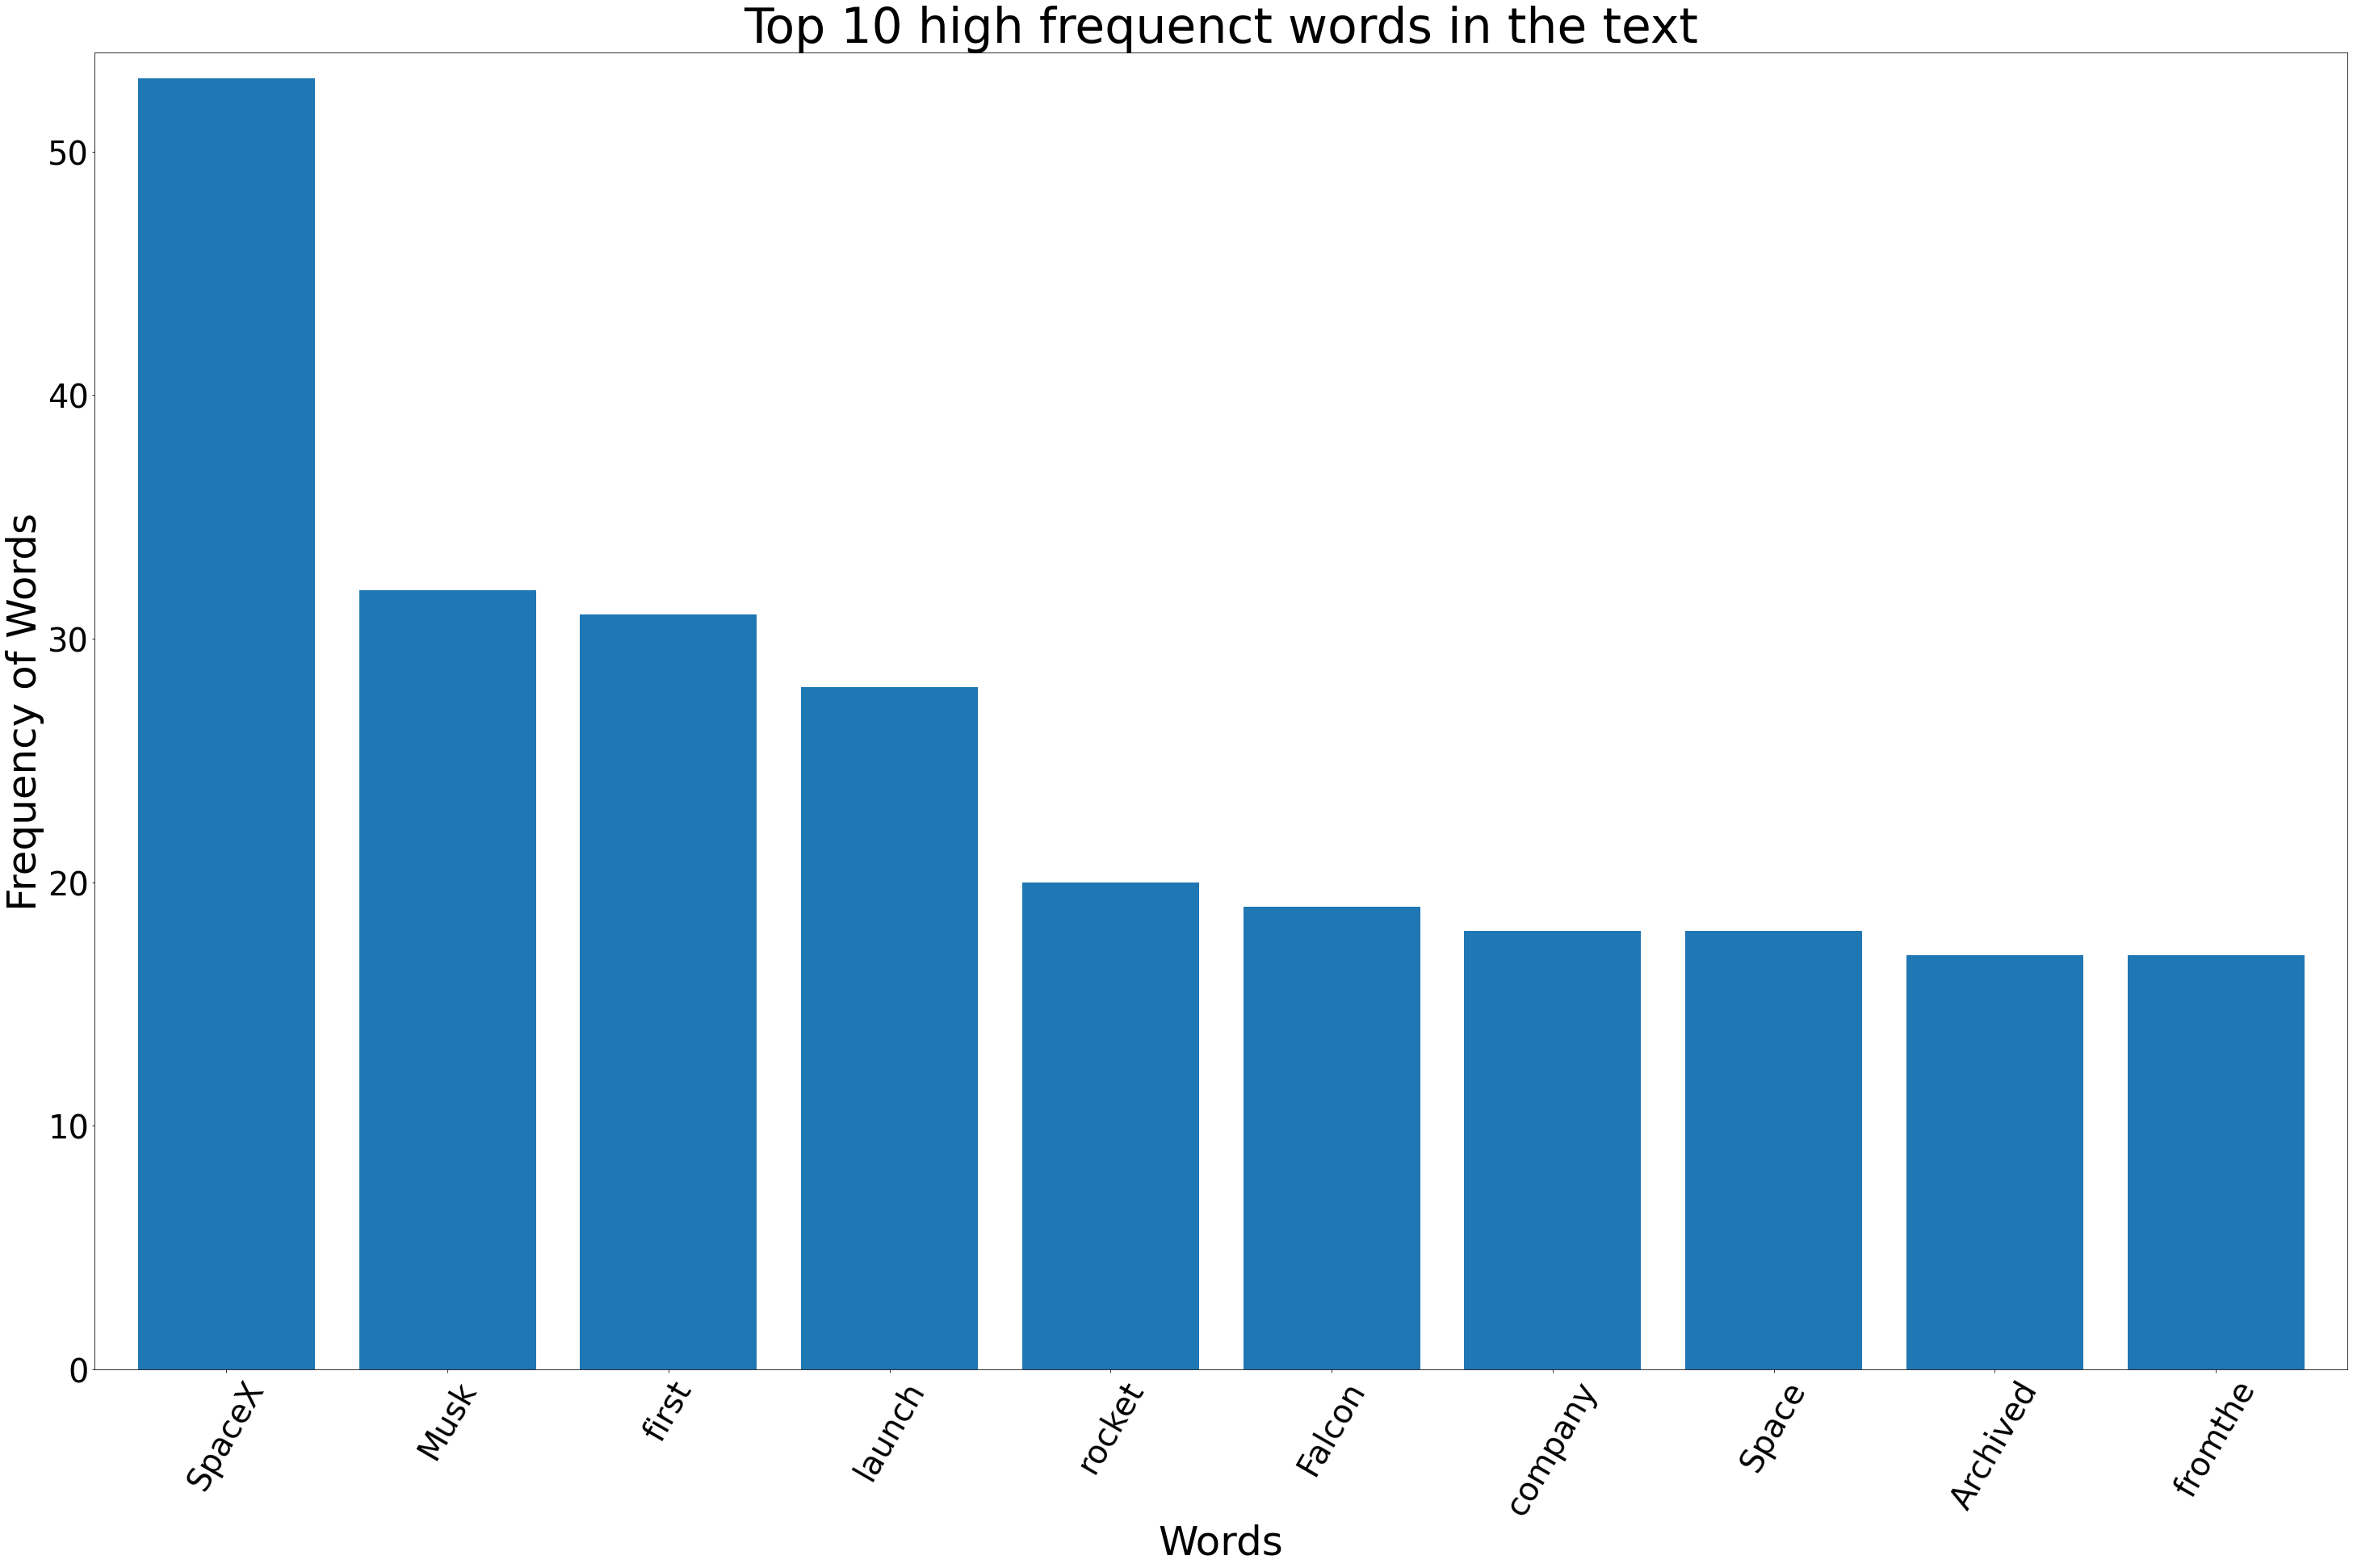

In [246]:
#Retrieve top 10 high frequent words to generate x and y for the plot. Where x is the words and y is the frequency
x, y = zip(*freq.most_common(10))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Top 10 high frequenct words in the text', fontsize=60)
plt.show()